# Approach
将本题抽象成树形结构，深度为k：
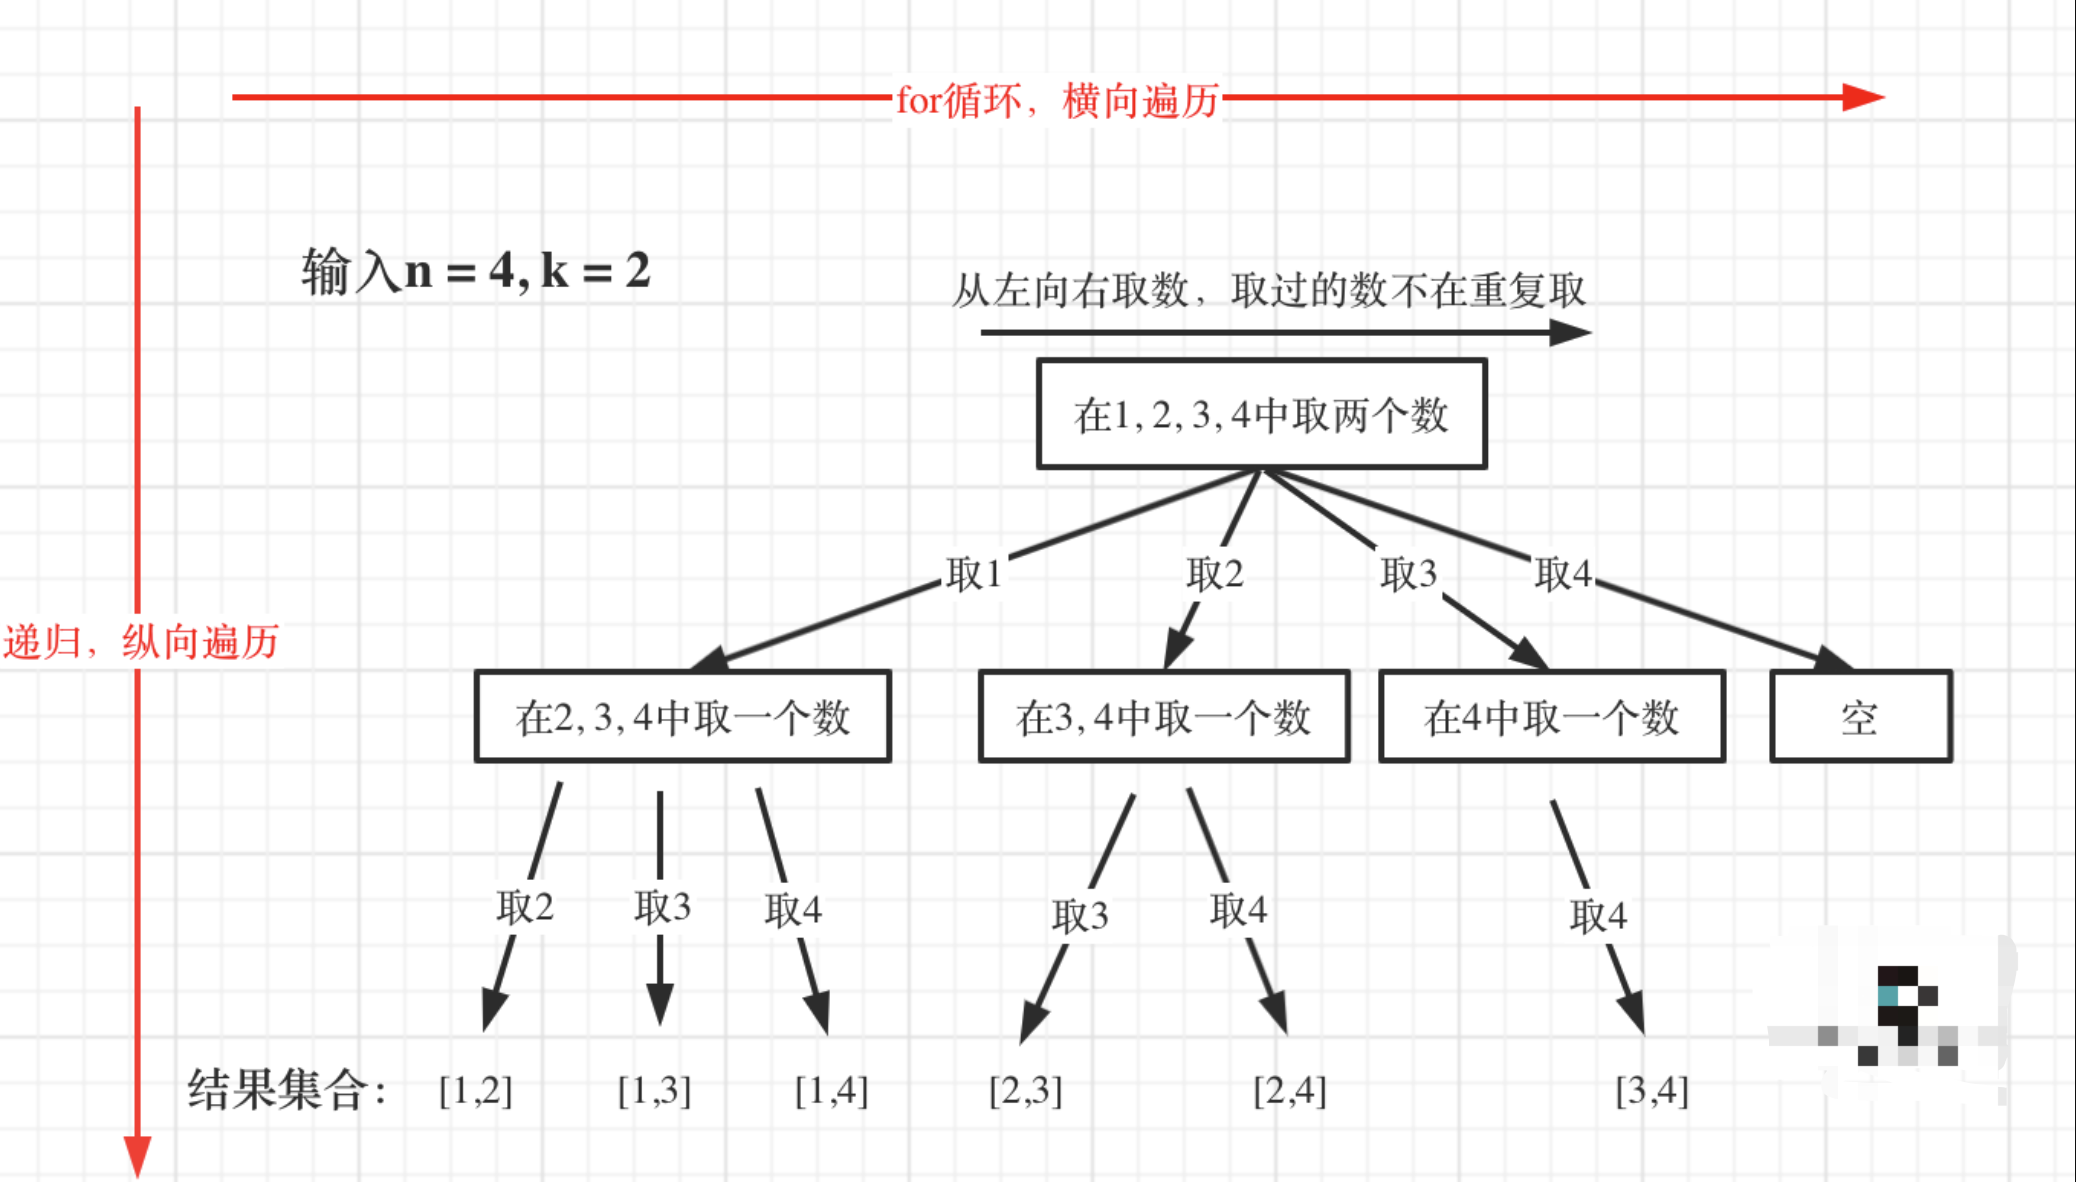

当然，本道题也可以剪枝优化，因为不是每一层的i都可以一直取到n！i的取值范围其实是有限制的！如下图所示：
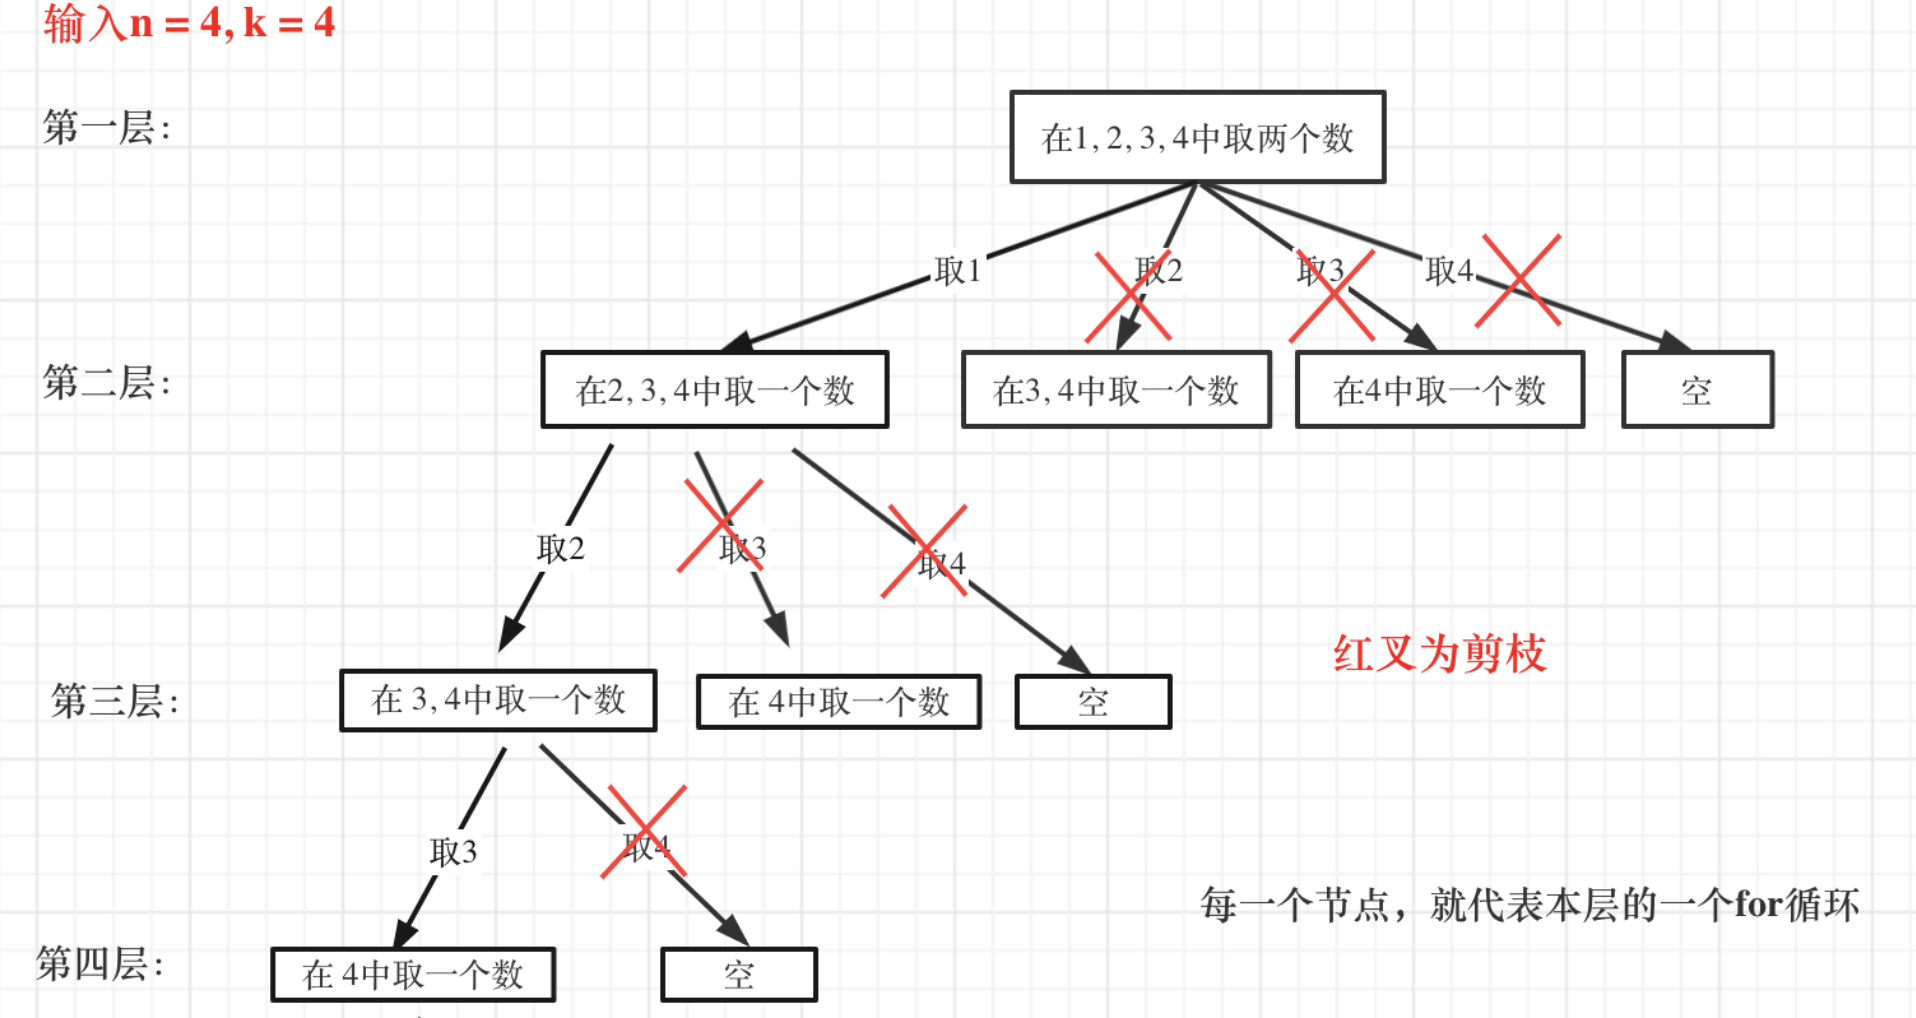
以n=4，k=4为例，第二次先取2，接下来最多也只能再取3和4，一共只有3个元素，少于4个！因此第二次先取2，第三次先取3，第四次先取4都没有意义！  
综上，假如此时path里面已经有`len(path)`个元素，我们一共要取k个，因此还需要取`k - len(path)`个元素！由于每层i的范围是startIndex到n，因此最多还能取`n - startIndex + 1`个元素！当`k - len(path) > n - startIndex + 1`时，终止递归！   

# Code

In [ ]:
# Time: O(k * C(n, k)), Space: O(n + k)
from typing import List
class Solution:
    def combine(self, n: int, k: int) -> List[List[int]]:
        # 存放符合条件的单一结果
        path = []
        # 存放符合条件的所有结果
        result = [] 
        
        # startIndex：记录本层从哪个元素开始遍历，防止重复元素！
        def backtrack(startIndex):
            # 终止条件：找到了k个元素！
            if len(path) == k:
                # 存放结果
                # 注意这里千万不能写成`.append(path)`！path is a reference to a list that is being modified throughout the recursion, appending path directly to result will lead to all elements of result pointing to the same list path, so that we should append the shallow copy of path!
                result.append(path[:])
                # 终止递归！
                return
            
            # 横向遍历
            for i in range(startIndex, n + 1): 
                path.append(i)
                # 纵向遍历
                self.backtrack(i + 1)
                # 回溯：删除之前加进去的i！
                path.pop() 
        
        
        backtrack(1)
        return result


In [ ]:
# 剪枝优化
class Solution:
    def combine(self, n: int, k: int) -> List[List[int]]:
        path = []
        result = []

        def backtrack(startIndex):
            # 剪枝
            if k - len(path) > n - startIndex + 1:
                return 

            if len(path) == k:
                result.append(path[:])
                return 
            
            for i in range(startIndex, n + 1):
                path.append(i)
                backtrack(i + 1)
                path.pop()
        
        backtrack(1)
        return result